In [1]:
# This notebook only does NN fitting, for ease of restarting after it crashes. It's an extension of wine_explore.

# Following this, then in the p3workshop running pip install let me install the modules
#http://echrislynch.com/2019/02/01/adding-an-environment-to-jupyter-notebooks/

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler

from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split
from IPython import display
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from xgboost import XGBRegressor
from xgboost import XGBClassifier

from tensorflow import keras
from tensorflow.keras import layers, callbacks


data = pd.read_csv('wineQualityReds.csv')


In [2]:
def adjust_normal(column):
    mn = column.mean()
    std = column.std()
    new = (column-mn)/std
    return new

In [3]:
# Data prep for regression model
data = pd.read_csv('wineQualityReds.csv')

#Adjust chlorides and sugars columns due to large-value outliers.
data["chlorides"] = pd.Series([min(x, 0.14) for x in data["chlorides"]])
data["residual.sugar"] = pd.Series([min(x, 5) for x in data["residual.sugar"]])

# Add pca-inspired vectors
#data["PC1"] = adjust_normal(data["volatile.acidity"]) - adjust_normal(data["sulphates"])
#data["PC2"] = adjust_normal(data["sulphates"]) - adjust_normal(data["alcohol"])
#data["PC3"] = adjust_normal(data["volatile.acidity"]) + adjust_normal(data["sulphates"])
#data["PC4"] = adjust_normal(data["citric.acid"]) - adjust_normal(data["volatile.acidity"])
#data["PC5"] = adjust_normal(data["alcohol"]) - adjust_normal(data["density"])
#data["PC6"] = adjust_normal(data["total.sulfur.dioxide"]) - adjust_normal(data["density"])
#data["PC7"] = adjust_normal(data["citric.acid"]) - adjust_normal(data["density"])
data["PC8"] = adjust_normal(data["chlorides"]) - adjust_normal(data["fixed.acidity"])

y = data.pop("quality")
X_train, X_valid, y_train, y_valid = train_test_split(data, y, test_size=0.33, random_state=454545)

# Scale X data to Gaussian distribution so magnitudes don't impact values

#sns.histplot(data["chlorides"])
std_scaler = StandardScaler()
X_cols = X_train.columns
X_train = std_scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=X_cols)
X_valid = std_scaler.transform(X_valid)
#X = pd.DataFrame(X_scld, columns=X_cols)
print(X_train.head())


# Add new vectors to X inspired by PCA vectors
#X_train["PC1"] = X["volatile.acidity"] - X["sulphates"]
#data["PC2"] = X["sulphates"] - X["alcohol"]
#data["PC3"] = X["volatile.acidity"] + X["sulphates"]
'''
#X_qual["PC1"] = X["volatile.acidity"] - X["sulphates"]
#X_qual["PC2"] = X["sulphates"] - X["alcohol"]
#X_qual["PC3"] = X["volatile.acidity"] + X["sulphates"]
big3pca = big3 + ["PC1", "PC2", "PC3"]
big6pca = big6 + ["PC1", "PC2", "PC3"]

X["PC4"] = X["citric.acid"] - X["volatile.acidity"]
X["PC5"] = X["alcohol"] - X["density"]
X["PC6"] = X["total.sulfur.dioxide"] - X["density"]
X["PC7"] = X["citric.acid"] - X["density"]
#def acid_balance(acid, sugar, salt):
X_qual["PC4"] = X["citric.acid"] - X["volatile.acidity"]
X_qual["PC5"] = X["alcohol"] - X["density"]
X_qual["PC6"] = X["total.sulfur.dioxide"] - X["density"]
X_qual["PC7"] = X["citric.acid"] - X["density"]
#def acid_balance(acid, sugar, salt):
X["PC8"] = acid_balance(X["fixed.acidity"], X["residual.sugar"], X["chlorides"])
X_qual["PC8"] = acid_balance(X["fixed.acidity"], X["residual.sugar"], X["chlorides"])
big6pca = big6 + ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8"]
big10pca = big10 + ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8"]


# Use clustering to make a categorical variable about acid balance
slsgac = ["fixed.acidity", "my_sugar", "my_chlorides"]
kmeans = KMeans(n_clusters=4)
X_qual["cl_slsgac"] = kmeans.fit_predict(X_qual[slsgac])
X_qual["cl_slsgac"] = X_qual["cl_slsgac"].astype("int")
'''

   Unnamed: 0  fixed.acidity  volatile.acidity  citric.acid  residual.sugar  \
0    1.114279      -0.925150         -0.373806    -0.136037       -0.840988   
1   -0.752271       2.666280         -1.169668     1.998125        0.239706   
2    0.495003       0.329000         -0.146417    -0.292195       -0.240603   
3   -1.031381       1.469137         -0.771737     1.061176       -0.720911   
4   -1.659379      -0.412089         -0.089570    -0.604511        0.479860   

   chlorides  free.sulfur.dioxide  total.sulfur.dioxide   density        pH  \
0  -0.246293             0.231042             -0.355485 -1.049424  0.508275   
1   0.553190            -0.061045              0.045554  1.544056 -1.695622   
2   0.303352             0.523129             -0.201239  0.096030  0.119352   
3   1.802382            -0.937305             -0.972466  0.787624 -0.075109   
4   1.402640             1.691476              0.847630 -0.671208 -0.917776   

   sulphates   alcohol       PC8  
0  -0.330402  0

'\n#X_qual["PC1"] = X["volatile.acidity"] - X["sulphates"]\n#X_qual["PC2"] = X["sulphates"] - X["alcohol"]\n#X_qual["PC3"] = X["volatile.acidity"] + X["sulphates"]\nbig3pca = big3 + ["PC1", "PC2", "PC3"]\nbig6pca = big6 + ["PC1", "PC2", "PC3"]\n\nX["PC4"] = X["citric.acid"] - X["volatile.acidity"]\nX["PC5"] = X["alcohol"] - X["density"]\nX["PC6"] = X["total.sulfur.dioxide"] - X["density"]\nX["PC7"] = X["citric.acid"] - X["density"]\n#def acid_balance(acid, sugar, salt):\nX_qual["PC4"] = X["citric.acid"] - X["volatile.acidity"]\nX_qual["PC5"] = X["alcohol"] - X["density"]\nX_qual["PC6"] = X["total.sulfur.dioxide"] - X["density"]\nX_qual["PC7"] = X["citric.acid"] - X["density"]\n#def acid_balance(acid, sugar, salt):\nX["PC8"] = acid_balance(X["fixed.acidity"], X["residual.sugar"], X["chlorides"])\nX_qual["PC8"] = acid_balance(X["fixed.acidity"], X["residual.sugar"], X["chlorides"])\nbig6pca = big6 + ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8"]\nbig10pca = big10 + ["PC1", "PC2

In [4]:
# Add the best NN model so far.
early_stopping = callbacks.EarlyStopping(
                        min_delta=0.0005, patience=600, restore_best_weights=True
                        )

model = keras.Sequential([
        layers.Dense(units=256, activation='sigmoid', input_shape=[X_train.shape[1]]),
        layers.Dropout(0.2),
        layers.Dense(units=512, activation='sigmoid'),
        layers.Dropout(0.2),
        layers.Dense(units=512, activation='sigmoid'),
        layers.Dropout(0.2),
        layers.Dense(units=128, activation='sigmoid'),
        layers.Dropout(0.2),
        layers.Dense(units=1)
    ])

model.compile(
            optimizer='adam',
            loss='mae'
            )

history = model.fit(
                    X_train, y_train,
                    validation_data=(X_valid, y_valid),
                    batch_size=256,
                    epochs=2000,
                    callbacks=[early_stopping]
                    )

wghts_fin = model.get_weights()
print(wghts_fin)

Epoch 1/2000
5/5 [==============================] - 3s 120ms/step - loss: 5.3086 - val_loss: 2.1817
Epoch 2/2000
5/5 [==============================] - 0s 35ms/step - loss: 1.6033 - val_loss: 0.7089
Epoch 3/2000
5/5 [==============================] - 0s 38ms/step - loss: 0.8094 - val_loss: 0.6760
Epoch 4/2000
5/5 [==============================] - 0s 37ms/step - loss: 0.7310 - val_loss: 0.6621
Epoch 5/2000
5/5 [==============================] - 0s 36ms/step - loss: 0.7842 - val_loss: 0.6564
Epoch 6/2000
5/5 [==============================] - 0s 37ms/step - loss: 0.7732 - val_loss: 0.6569
Epoch 7/2000
5/5 [==============================] - 0s 33ms/step - loss: 0.7637 - val_loss: 0.6606
Epoch 8/2000
5/5 [==============================] - 0s 71ms/step - loss: 0.7585 - val_loss: 0.6657
Epoch 9/2000
5/5 [==============================] - 0s 35ms/step - loss: 0.7480 - val_loss: 0.6710
Epoch 10/2000
5/5 [==============================] - 0s 35ms/step - loss: 0.7450 - val_loss: 0.6750
Epoch 11

In [5]:
#history_sigmdo = pd.DataFrame(history.history)
history_sigmdo["val_loss"].plot(xlim=[50, 2000], ylim=[0.35, 0.6])

NameError: name 'history_sigmdo' is not defined

In [ ]:
#history_sigmdo_myss = pd.DataFrame(history.history)
history_sigmdo_myss["val_loss"].plot(xlim=[50, 2000], ylim=[0.35, 0.6])

In [ ]:
#history_sigmdo_pca = pd.DataFrame(history.history)
history_sigmdo_pca["val_loss"].plot(xlim=[50, 2000], ylim=[0.35, 0.6])

In [ ]:
#history_sigmdo_pcaab = pd.DataFrame(history.history)
history_sigmdo_pcaab["val_loss"].plot(xlim=[50, 2000], ylim=[0.35, 0.6])

<AxesSubplot:>

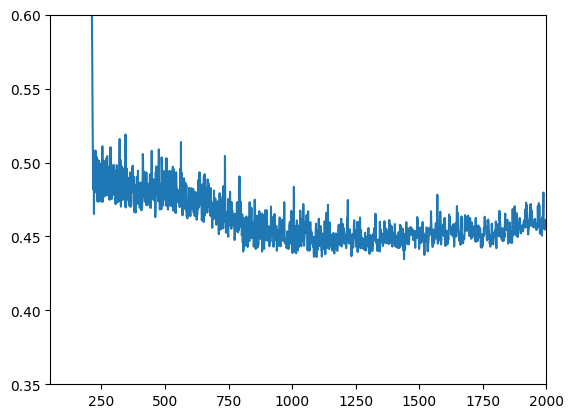

In [6]:
# This is the best so far. It uses my acid-balance PC column, all 12 original columns, with chlorides and residual changed to be
# without outliers.

#history_sigmdo_ab = pd.DataFrame(history.history)
history_sigmdo_ab["val_loss"].plot(xlim=[50, 2000], ylim=[0.35, 0.6])

In [7]:
# Data prep for classification model
data = pd.read_csv('wineQualityReds.csv')

#Adjust chlorides and sugars columns due to large-value outliers.
data["chlorides"] = pd.Series([min(x, 0.14) for x in data["chlorides"]])
data["residual.sugar"] = pd.Series([min(x, 5) for x in data["residual.sugar"]])

# Add pca-inspired vectors
#data["PC1"] = adjust_normal(data["volatile.acidity"]) - adjust_normal(data["sulphates"])
#data["PC2"] = adjust_normal(data["sulphates"]) - adjust_normal(data["alcohol"])
#data["PC3"] = adjust_normal(data["volatile.acidity"]) + adjust_normal(data["sulphates"])
#data["PC4"] = adjust_normal(data["citric.acid"]) - adjust_normal(data["volatile.acidity"])
#data["PC5"] = adjust_normal(data["alcohol"]) - adjust_normal(data["density"])
#data["PC6"] = adjust_normal(data["total.sulfur.dioxide"]) - adjust_normal(data["density"])
#data["PC7"] = adjust_normal(data["citric.acid"]) - adjust_normal(data["density"])
data["PC8"] = adjust_normal(data["chlorides"]) - adjust_normal(data["fixed.acidity"])

y = (np.sign(data["quality"]-4.5)+1.)/2. # 1 for quality \geq 7, and 0 for quality < 7.
data = data.drop("quality", axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(data, y, stratify=y, test_size=0.33, random_state=454545)

# Scale X data to Gaussian distribution so magnitudes don't impact values

#sns.histplot(data["chlorides"])
std_scaler = StandardScaler()
X_cols = X_train.columns
X_train = std_scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=X_cols)
X_valid = std_scaler.transform(X_valid)
#X = pd.DataFrame(X_scld, columns=X_cols)
print(X_train.head())
print(y.head(9))

   Unnamed: 0  fixed.acidity  volatile.acidity  citric.acid  residual.sugar  \
0    0.993884      -0.316968          0.978197    -1.083420       -0.602668   
1    0.341949       0.308735         -2.297206     0.914786       -0.724429   
2    1.703722      -0.658260         -0.772449     0.863550        0.249662   
3    0.271179      -0.885788         -0.659504     0.197481        3.171935   
4    0.189687      -0.658260          0.413472    -1.185892        0.127901   

   chlorides  free.sulfur.dioxide  total.sulfur.dioxide   density        pH  \
0  -0.137756             0.378987             -0.364508 -0.264367  0.589396   
1  -0.337197            -0.565285             -0.785882 -0.665501  0.653703   
2  -0.785940             0.567841              0.026768 -0.971630 -0.053680   
3   0.111546             0.945550             -0.063526  0.770136  0.460781   
4  -0.287337             0.190133              1.230693  0.353168  1.425394   

   sulphates   alcohol       PC8  
0   0.184678  0

In [8]:
early_stopping = callbacks.EarlyStopping(
                        min_delta=0.0005, patience=600, restore_best_weights=True
                        )

model_class = keras.Sequential([
        layers.Dense(units=256, activation='sigmoid', input_shape=[X_train.shape[1]]),
        layers.Dropout(0.2),
        layers.Dense(units=512, activation='sigmoid'),
        layers.Dropout(0.2),
        layers.Dense(units=512, activation='sigmoid'),
        layers.Dropout(0.2),
        layers.Dense(units=128, activation='sigmoid'),
        layers.Dropout(0.2),
        layers.Dense(units=1, activation='sigmoid')
    ])

model_class.compile(
            optimizer='adam',
            loss='binary_crossentropy',
            metrics=['binary_accuracy']
            )

history_class = model_class.fit(
                    X_train, y_train,
                    validation_data=(X_valid, y_valid),
                    batch_size=256,
                    epochs=2000,
                    callbacks=[early_stopping]
                    )

wghts_class_fin = model_class.get_weights()
print(wghts_class_fin)

Epoch 1/2000
5/5 [==============================] - 2s 76ms/step - loss: 0.6820 - binary_accuracy: 0.6032 - val_loss: 0.1673 - val_binary_accuracy: 0.9602
Epoch 2/2000
5/5 [==============================] - 0s 27ms/step - loss: 0.1688 - binary_accuracy: 0.9608 - val_loss: 0.1850 - val_binary_accuracy: 0.9602
Epoch 3/2000
5/5 [==============================] - 0s 28ms/step - loss: 0.1838 - binary_accuracy: 0.9608 - val_loss: 0.1947 - val_binary_accuracy: 0.9602
Epoch 4/2000
5/5 [==============================] - 0s 30ms/step - loss: 0.1867 - binary_accuracy: 0.9608 - val_loss: 0.1979 - val_binary_accuracy: 0.9602
Epoch 5/2000
5/5 [==============================] - 0s 28ms/step - loss: 0.1954 - binary_accuracy: 0.9608 - val_loss: 0.1979 - val_binary_accuracy: 0.9602
Epoch 6/2000
5/5 [==============================] - 0s 29ms/step - loss: 0.1944 - binary_accuracy: 0.9608 - val_loss: 0.1959 - val_binary_accuracy: 0.9602
Epoch 7/2000
5/5 [==============================] - 0s 28ms/step - los

In [ ]:
# Classification for 6,7,8 v 3,4,5
#history_class55 = pd.DataFrame(history_class.history)
history_class55["val_binary_accuracy"].plot(xlim=[50, 2000], ylim=[0.65, 1.0])
history_class55["binary_accuracy"].plot(xlim=[50, 2000], ylim=[0.65, 1.0])

<AxesSubplot:>

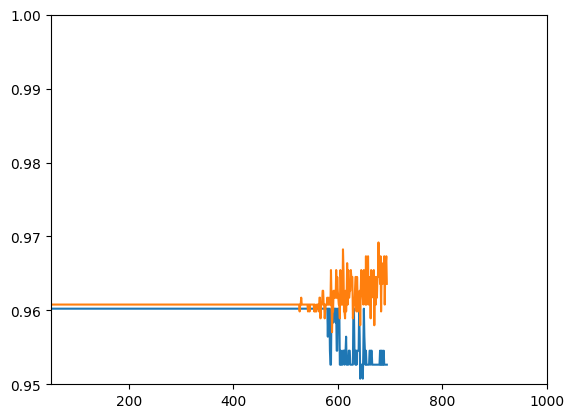

In [9]:
# Classification for 5,6,7,8 v 3,4
history_class45 = pd.DataFrame(history_class.history)
history_class45["val_binary_accuracy"].plot(xlim=[50, 1000], ylim=[0.95, 1.0])
history_class45["binary_accuracy"].plot(xlim=[50, 1000], ylim=[0.95, 1.0])